In [1]:
def importing_data():
    import pandas as pd
    n=True
    while n:
        try:
            direction=input("Enter Direction...\n")
            df=pd.read_csv(str(direction))
            print("Great...You're Amazing...\n\n")
            n=False
        except:
            print('Wrong Direction...Try Again')   
            
            
    return df
     

In [2]:
def feature_scalling():
    import pandas as pd
    
    #Importing data using importing_data function
    df = importing_data()
    
    print('which feature scalling method do you want...?')
    print('A == Normalization ')
    print('B == standardization\n\n')
    
    y = df.iloc[:,-1]
    df = df.iloc[:,:-1]
    feature_scalling = input(' Enter (A) or (B)')
    while True:
          if (feature_scalling.upper() == 'A') or (feature_scalling.upper()=='B'):
              break
          else:
              print(' Enter (A) or (B)')
              feature_scalling = input(' Enter (A) or (B)\n')
            
     
    
    if  feature_scalling =='A':
        from sklearn.preprocessing import Normalizer
        n = Normalizer()
        dfn = n.fit_transform(df)
        dfn = pd.DataFrame(dfn ,index=df.index , columns = df.columns)
        dfn["y"] =y 
        return dfn
    
    else:
        from sklearn.preprocessing import StandardScaler
        s = StandardScaler()
        dfs = s.fit_transform(df)
        dfs = pd.DataFrame(dfs ,index=df.index , columns = df.columns)
        dfs['y'] = y
        return dfs

In [3]:
def splitting_data():
    from sklearn.model_selection import train_test_split
    
    
    #import data with importing_data function
    df = feature_scalling()
    
    
    while (True):
        try:
            train_size = int(input('What Percentage (Train Data)\n'))
            print("Perfect....")
            break
        except:
            print("Try Again")
    
    test_size = 100-train_size
    test_size = test_size/100
    
    X  = df.iloc[:,:-1].values
    Y  = df.iloc[:,-1].values
    
    x_train,x_test,y_train,y_test = train_test_split(X,Y , test_size=test_size ,random_state=0)
    
    test_train_data = {}
    test_train_data['X_Test']=x_test
    test_train_data['X_train']=x_train
    test_train_data['Y_Test']=y_test
    test_train_data['Y_train']=y_train
    
    return test_train_data

import splitted Data with spliting_data function ( 80 percent )


In [4]:
train_test_data_1 = splitting_data()

Enter Direction...
data1.csv
Great...You're Amazing...


which feature scalling method do you want...?
A == Normalization 
B == standardization


 Enter (A) or (B)a
What Percentage (Train Data)
80
Perfect....


In [5]:
from sklearn.linear_model import LogisticRegression
classifire_80 = LogisticRegression()
classifire_80.fit(train_test_data_1["X_train"] , train_test_data_1['Y_train'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
y_pred_1 = classifire_80.predict(train_test_data_1['X_Test'])

In [7]:
import numpy as np
print(np.concatenate((y_pred_1.reshape(len(y_pred_1),1), train_test_data_1['Y_Test'].reshape(len(train_test_data_1['Y_Test']),1)),1))

[[-1 -1]
 [-1 -1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred_1 ,train_test_data_1['Y_Test'])
cm

array([[82,  1],
       [ 3, 54]], dtype=int64)

In [9]:
ac_80 = accuracy_score(y_pred_1 ,train_test_data_1['Y_Test'])

import splitted Data with spliting_data function ( 75 percent )


In [10]:
train_test_data_2 = splitting_data()

Enter Direction...
data.csv1
Wrong Direction...Try Again
Enter Direction...
data1.csv
Great...You're Amazing...


which feature scalling method do you want...?
A == Normalization 
B == standardization


 Enter (A) or (B)a
What Percentage (Train Data)
75
Perfect....


In [11]:
#modeling data 
classifire_75 = LogisticRegression().fit(train_test_data_2['X_train'] ,train_test_data_2['Y_train'])

In [12]:
y_pred_2 = classifire_75.predict(train_test_data_2['X_Test'])
print(np.concatenate((y_pred_2.reshape(len(y_pred_2),1)  ,train_test_data_2['Y_Test'].reshape(len(train_test_data_2['Y_Test']),1)) ,1))

[[-1 -1]
 [-1 -1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 

In [13]:
cm_75 = confusion_matrix(y_pred_2 ,train_test_data_2["Y_Test"])
ac_75 = accuracy_score(y_pred_2 ,train_test_data_2["Y_Test"])
print(cm_75)

[[109   3]
 [  3  60]]


<BarContainer object of 2 artists>

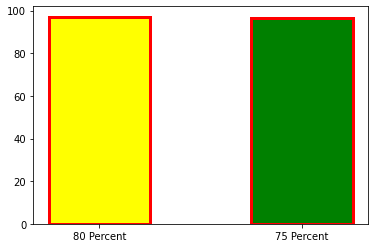

In [14]:
import matplotlib.pyplot as plt

bar = [ac_80*100 ,ac_75*100]
y = ['Accuracy 80' ,'Accuracy 75']

plt.bar(y,bar,color=['yellow','green'], width=0.5,edgecolor='red',linewidth=3,tick_label=["80 Percent",'75 Percent'])
